In [10]:
import os

folder_path = r"D:\Codeveda_Intership\drive-download-20250505T064604Z-1-001"
print("Files in folder:")
print(os.listdir(folder_path))

Files in folder:
['1) iris.csv', '2) Stock Prices Data Set.csv', '3) Sentiment dataset.csv', '4) house Prediction Data Set.csv']


In [14]:
import pandas as pd
df = pd.read_csv(r"D:\Codeveda_Intership\drive-download-20250505T064604Z-1-001\1) iris.csv")
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


# Data Cleaning and Preprocessing

In [10]:
# 1. Import Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

# 2. Load the Dataset
file_path = r"D:\Codeveda_Intership\drive-download-20250505T064604Z-1-001\1) iris.csv"
df = pd.read_csv(file_path)

# 3. Identify and Handle Missing Values
print("🔹 Missing Values Before:")
print(df.isnull().sum())

# Fill numeric columns with mean
num_cols = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
df[num_cols] = df[num_cols].fillna(df[num_cols].mean())

# Fill categorical column with mode
df['species'] = df['species'].fillna(df['species'].mode()[0])

print("\n🔹 Missing Values After:")
print(df.isnull().sum())

# 4. Remove Duplicate Rows
df.drop_duplicates(inplace=True)

# 5. Standardize Inconsistent Data Formats (e.g., lowercase species names)
df['species'] = df['species'].astype(str).str.strip().str.lower()


🔹 Missing Values Before:
sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

🔹 Missing Values After:
sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64


# Summary Statistics and Distribution Analysis


🔹 Data Info:
<class 'pandas.core.frame.DataFrame'>
Index: 147 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  147 non-null    float64
 1   sepal_width   147 non-null    float64
 2   petal_length  147 non-null    float64
 3   petal_width   147 non-null    float64
 4   species       147 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.9+ KB

🔹 Summary Statistics:
       sepal_length  sepal_width  petal_length  petal_width
count    147.000000   147.000000    147.000000   147.000000
mean       5.856463     3.055782      3.780272     1.208844
std        0.829100     0.437009      1.759111     0.757874
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.400000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.40000

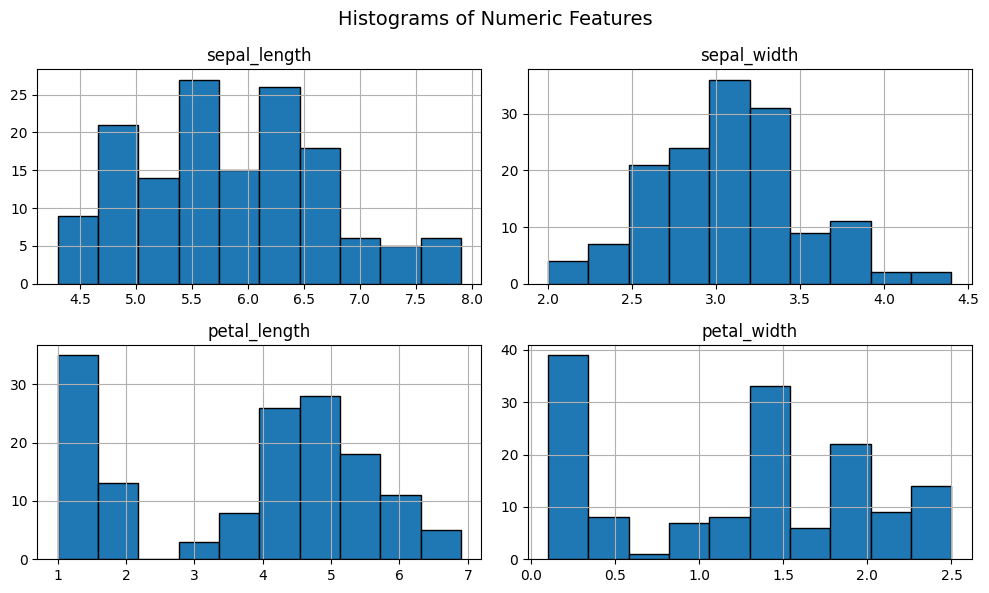

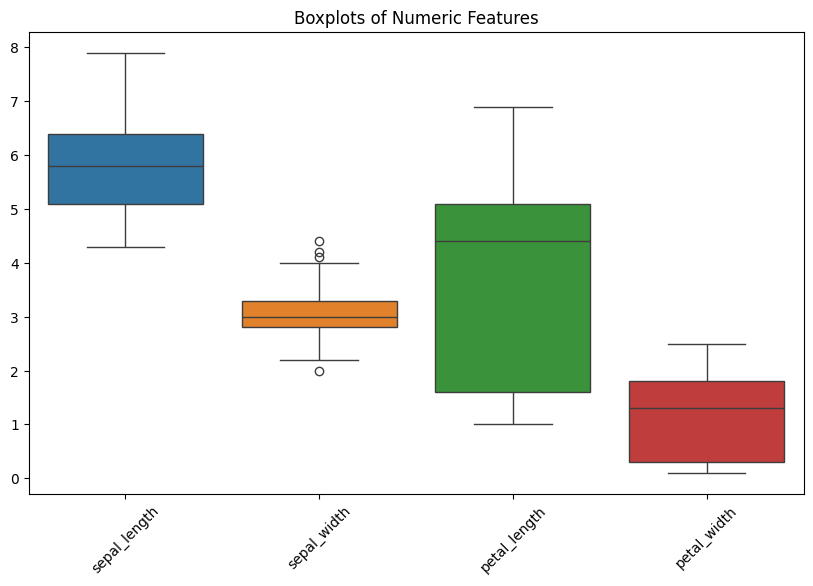

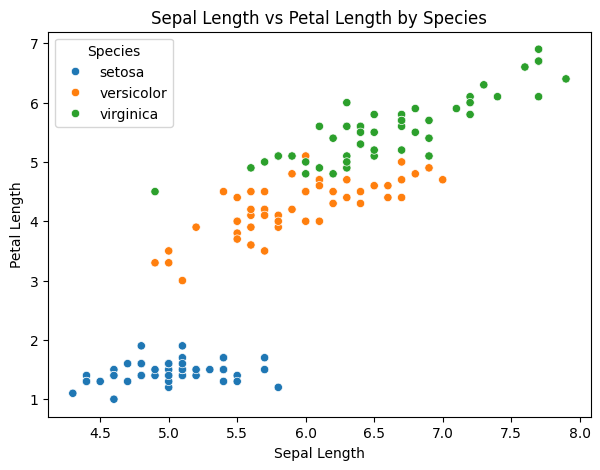

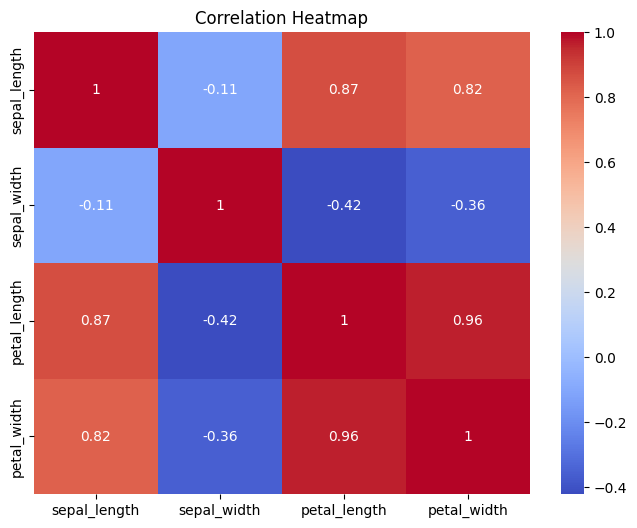

In [11]:
# 6. Data Overview
print("\n🔹 Data Info:")
df.info()

print("\n🔹 Summary Statistics:")
print(df.describe())

print("\n🔹 Median:")
print(df.median(numeric_only=True))

print("\n🔹 Mode:")
print(df.mode(numeric_only=True).iloc[0])

print("\n🔹 Standard Deviation:")
print(df.std(numeric_only=True))

# 7. Create Folder to Save Visualizations
os.makedirs("plots", exist_ok=True)

# 8. Histograms
df[num_cols].hist(figsize=(10, 6), edgecolor='black')
plt.suptitle('Histograms of Numeric Features', fontsize=14)
plt.tight_layout()
plt.savefig("plots/histograms.png")
plt.show()

# 9. Boxplots
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[num_cols])
plt.title('Boxplots of Numeric Features')
plt.xticks(rotation=45)
plt.savefig("plots/boxplots.png")
plt.show()

# 10. Scatter Plot: Sepal Length vs Petal Length
plt.figure(figsize=(7, 5))
sns.scatterplot(x='sepal_length', y='petal_length', hue='species', data=df)
plt.title('Sepal Length vs Petal Length by Species')
plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')
plt.legend(title='Species')
plt.savefig("plots/scatter_sepal_petal.png")
plt.show()

# 11. Correlation Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.savefig("plots/correlation_heatmap.png")
plt.show()


# Custom Visualizations and Export for Reporting

C:\Users\navee\AppData\Local\Temp\ipykernel_13308\2920455573.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='species', data=df, palette='Set2')


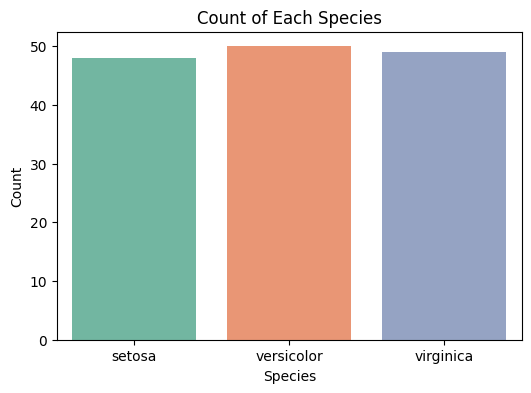

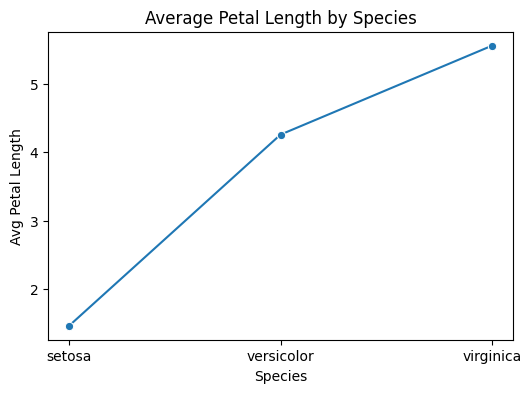

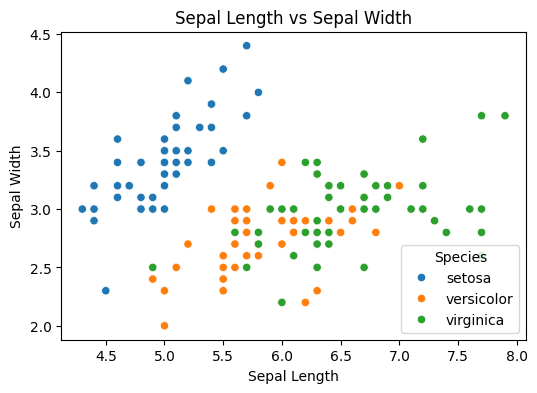

In [12]:
# 12. Bar Plot: Species Count
plt.figure(figsize=(6, 4))
sns.countplot(x='species', data=df, palette='Set2')
plt.title('Count of Each Species')
plt.xlabel('Species')
plt.ylabel('Count')
plt.savefig("plots/species_barplot.png")
plt.show()

# 13. Line Chart: Average Petal Length by Species
avg_petal = df.groupby('species')['petal_length'].mean().reset_index()

plt.figure(figsize=(6, 4))
sns.lineplot(x='species', y='petal_length', data=avg_petal, marker='o')
plt.title('Average Petal Length by Species')
plt.xlabel('Species')
plt.ylabel('Avg Petal Length')
plt.savefig("plots/line_avg_petal_length.png")
plt.show()

# 14. Scatter Plot: Sepal Length vs Sepal Width
plt.figure(figsize=(6, 4))
sns.scatterplot(data=df, x='sepal_length', y='sepal_width', hue='species')
plt.title('Sepal Length vs Sepal Width')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend(title='Species')
plt.savefig("plots/scatter_sepal_length_width.png")
plt.show()
